In [1]:
import pandas as pd
import numpy as np
import spacy
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [2]:
wd = './'
train_path = wd + 'train.csv'
random_state = 1

In [3]:
np.random.seed(random_state)

In [4]:
data = pd.read_csv(train_path)

In [5]:
data['target'].describe()

count    2834.000000
mean       -0.959319
std         1.033579
min        -3.676268
25%        -1.690320
50%        -0.912190
75%        -0.202540
max         1.711390
Name: target, dtype: float64

In [7]:
data['standard_error']

0       0.464009
1       0.480805
2       0.476676
3       0.450007
4       0.510845
          ...   
2829    0.646900
2830    0.535648
2831    0.483866
2832    0.514128
2833    0.512379
Name: standard_error, Length: 2834, dtype: float64

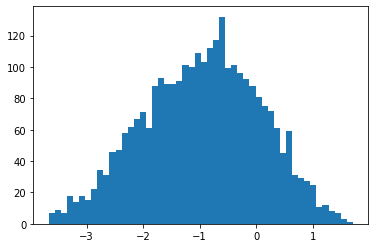

In [8]:
hist1 = plt.hist(data['target'], bins=50)
plt.show()

In [9]:
nlp = spacy.load("en_core_web_lg")

In [10]:
with nlp.disable_pipes():
    data_vecs = np.array([nlp(text).vector for text in data['excerpt']])
    data_lbls = data['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_vecs, data_lbls, test_size=0.1)

In [19]:
xgb.set_config(verbosity=1)

In [94]:
np.sqrt(mean_squared_error(np.full((data.shape[0],),data['target'].mean()), data['target']))

1.033396832247627

In [100]:
params = {
    'base_score': 0.5,
    'n_estimators': 200,
    'max_depth': 2,
    'learning_rate': 0.1,
    'verbosity': 1,
    'random_state': random_state
}
model = xgb.XGBRegressor(objective="reg:squarederror", **params)

In [101]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [102]:
y_pred = model.predict(X_test)

In [104]:
np.sqrt(mean_squared_error(y_pred, y_test))

0.6603736247497498

In [110]:
cluster = KMeans(n_clusters=8)

In [111]:
cluster.fit(X_train)

KMeans()

In [136]:
cluster_groups = pd.DataFrame({'excerpt': data['excerpt'],
                               'target': data['target'],
                               'cluster_label': cluster.predict(data_vecs)}) \
                    .groupby('cluster_label') \
                    .describe()

In [143]:
cluster_groups[('target','mean')]

cluster_label
0   -0.836973
1   -1.094006
2   -1.566713
3   -1.608727
4   -0.816032
5   -0.167110
6   -1.772436
7   -1.029208
Name: (target, mean), dtype: float64